In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
dis_df = pd.DataFrame([
    [0,1,2,3,1,2,3,4],
    [1,0,1,2,2,1,2,3],
    [2,1,0,1,3,2,1,2],
    [3,2,1,0,4,3,2,1],
    [1,2,3,4,0,1,2,3],
    [2,1,2,3,1,0,1,2],
    [3,2,1,2,2,1,0,1],
    [4,3,2,1,3,2,1,0]],
    columns=['A','B','C','D','E','F','G','H'],
    index=['A','B','C','D','E','F','G','H'],
)
flow_df = pd.DataFrame([
    [0,5,2,4,1,0,0,6],
    [5,0,3,0,2,2,2,0],
    [2,3,0,0,0,0,0,5],
    [4,0,0,0,5,2,2,10],
    [1,2,0,5,0,10,0,0],
    [0,2,0,2,10,0,5,1],
    [0,2,0,2,0,5,0,10],
    [6,0,5,10,0,1,10,0]],
    columns=['A','B','C','D','E','F','G','H'],
    index=['A','B','C','D','E','F','G','H'],
)

In [9]:
# funcion de paso combinatoria
def step(sol):
    # genera indices a intercambiar
    i = np.random.randint(0, len(sol))
    j = np.random.randint(0, len(sol))
    # se asegura de no cambiar por si mismo
    while i == j:
        j = np.random.randint(0, len(sol))
    return i, j

def move(sol, i, j):
    # cambia valores
    sol[i], sol[j] = sol[j], sol[i]
    return sol

def calc_obj_fun(dis_df, flow_df, sol):
    new_dis_df = dis_df.reindex(columns=sol, index=sol)
    new_dis_arr = np.array(new_dis_df)
    obj_fun_df = pd.DataFrame(new_dis_arr*flow_df)
    obj_fun_arr = np.array(obj_fun_df)
    return sum(sum(obj_fun_arr))

objetivo original: 366

Final solution: ['B', 'A', 'E', 'C', 'D', 'H', 'G', 'F']
Minimized cost: 214


(2500, 0)

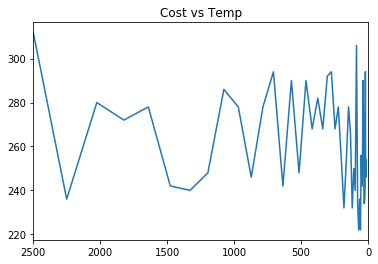

In [120]:
# parametros del algoritmo
Ti = 2500
T0 = Ti
M = 50
N = 100
alpha = 0.9
X0 = ['A','B','C','D','E','F','G','H']
np.random.shuffle(X0) # iniciamos en una solucion aleatoria
# valor objetivo original
of_act = calc_obj_fun(dis_df, flow_df, X0)
print(f'objetivo original: {of_act}')
explorations = []
explore_count = 0
Temp = []
Min_cost = []
for i in range(M):
    for j in range(N):
        # genera siguiente movimiento
        next_step = step(X0)
        # calcula valor objetivo
        move(X0, *next_step) # mov temporal
        of_new = calc_obj_fun(dis_df, flow_df, X0)
        move(X0, *next_step) # regresa a step anterior
        # flip a coin to se if we move:
        will = 1/(np.exp(of_new-of_act)/T0)
        toss = np.random.rand()
        if of_new <= of_act:
            # movimiento chido, nos movemos
            move(X0, *next_step)
            of_act = of_new
        elif toss <= will:
            # movimiento no tan chido, pero a ver que encontramos
            move(X0, *next_step)
            of_act = of_new
            explore_count += 1
            explorations.append(explore_count)
            # print(f'SI EXPLORE (will={will}, rand={toss})')
        else:
            explorations.append(explore_count)
            # print(f'NO EXPLORE (will={will}, rand={toss})') # mov feo y no estamos dispuestos a explorar
    Temp.append(T0)
    Min_cost.append(of_new)
    T0 = alpha*T0
print()
print(f'Final solution: {X0}')
print(f'Minimized cost: {of_act}')

plt.plot(Temp, Min_cost)
plt.title('Cost vs Temp')
plt.xlim(Ti, 0)

(4910, 0)

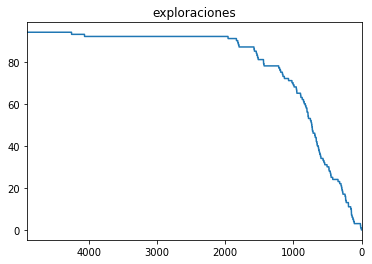

In [119]:
plt.plot(range(len(explorations)), explorations)
plt.title('exploraciones')
plt.xlim(len(explorations), 0)

In [45]:
X0 = ['G','C','B','E','D','H','G','A']
calc_obj_fun(dis_df, flow_df, X0)

284

In [59]:
def temperatures(T0, alpha, M):
    Ts = [T0]
    for i in range(M):
        T0 = alpha * T0
        Ts.append(T0)
    return Ts

def willingness(of_new, of_act, Ts):
    return [1/(np.exp(of_new-of_act)/T0) for T0 in Ts]

In [60]:
from pprint import pprint
Ts = temperatures(1000, 0.85, 50)
wills = willingness(200, 250, Ts)
pprint(Ts)
pprint(wills)

[1000,
 850.0,
 722.5,
 614.125,
 522.00625,
 443.7053125,
 377.149515625,
 320.57708828125,
 272.4905250390625,
 231.61694628320313,
 196.87440434072266,
 167.34324368961427,
 142.2417571361721,
 120.9054935657463,
 102.76966953088436,
 87.3542191012517,
 74.25108623606394,
 63.11342330065435,
 53.646409805556196,
 45.599448334722766,
 38.75953108451435,
 32.945601421837196,
 28.003761208561617,
 23.803197027277374,
 20.23271747318577,
 17.197809852207904,
 14.618138374376718,
 12.42541761822021,
 10.561604975487178,
 8.9773642291641,
 7.6307595947894855,
 6.486145655571063,
 5.513223807235403,
 4.686240236150092,
 3.983304200727578,
 3.3858085706184413,
 2.8779372850256753,
 2.446246692271824,
 2.0793096884310502,
 1.7674132351663927,
 1.5023012498914337,
 1.2769560624077185,
 1.0854126530465606,
 0.9226007550895765,
 0.78421064182614,
 0.6665790455522189,
 0.5665921887193861,
 0.48160336041147817,
 0.40936285634975644,
 0.347958427897293,
 0.29576466371269905]
[5.184705528587072e+24

In [99]:
# TODO: Funcion para evaluar Temperatura inicial correcta
1/(np.exp(214-280)/0.0000000000000000000000000001)

4.607186634331292